In [1]:
import numpy as np
from matplotlib import pyplot as plt

import pickle

%matplotlib inline

In [26]:
def trade_sign_reshape(trade_sign, time_t_step):
    # Reshape the array in group of values of t_step ms and infer the number
    # of rows, then sum all rows.
    trade_sign_j_sec_sum = np.sum(np.reshape(trade_sign, (len(time_t_step), -1)),
                                  axis=1)

    # Reasign the trade sign, if the value of the array is greater than 0
    # gives a 1 and -1 for the contrary.
    trade_sign_j_sec_avg = -1 * (trade_sign_j_sec_sum > 0) \
         +1 * (trade_sign_j_sec_sum < 0)
    # Reshape the array in group of values of t_step ms and infer the number
    # rows, then sum the absolute value of all rows. This is used to know
    # where a trade sign is cero.
    trade_sign_j_sec_nr = np.sum(np.reshape(np.absolute(trade_sign),
                                 (len(time_t_step), -1)), axis=1)
    return (trade_sign_j_sec_avg, trade_sign_j_sec_nr, trade_sign_j_sec_sum)

In [27]:
def cross_response_data(ticker_i, ticker_j, day, tau_val, t_step):
    
    print('Cross response function data')
    print('Processing data for the stock i ' + ticker_i + ' and stock j ' +
          ticker_j + ' the day ' + day + ' March, 2016')
    print('Time step: ', t_step, 'ms')

    # Load data
    midpoint_i = pickle.load(open(
                '../Cross_response_individual_stock/Data/midpoint_data/midpoint_201603{}_{}.pickl'
                .format(day, ticker_i), 'rb'))
    trade_sign_j = pickle.load(open(
                '../Cross_response_individual_stock/Data/trade_signs_data/trade_signs_most_201603{}_{}.pickl'
                .format(day, ticker_j), 'rb'))
    time = pickle.load(open('../Cross_response_individual_stock/Data/midpoint_data/time.pickl', 'rb'))

    # Setting variables to work with t_step ms accuracy
    # Array of the average of each tau. 10^3 s used by Wang
    cross_response_tau = np.zeros(tau_val)

    # Using values each second
    midpoint_i_sec = midpoint_i[::t_step]
    # Changing time from 1 ms to t_step ms
    time_t_step = time[::t_step]
    
    # Trade signs

    trade_sign_j_sec_avg, trade_sign_j_sec_nr, trade_sign_j_sec_sum = trade_sign_reshape(trade_sign_j, time_t_step)

    # Calculating the midpoint log return and the cross response function

    for tau in range(1, tau_val):

        # Every second have a log-return
        #log_return_i_sec = 0. * time_t_step

        # Obtain the midpoint log return. Displace the numerator tau values to
        # the right and compute the return, and append the remaining values of
        # tau with zeros
        log_return_i_sec = np.append(np.log(
            midpoint_i_sec[tau:]/midpoint_i_sec[:-tau]), np.zeros(tau))

        cross_response_tau[tau] = np.mean(
            log_return_i_sec[trade_sign_j_sec_nr != 0] *
            trade_sign_j_sec_avg[trade_sign_j_sec_nr != 0])

    return (cross_response_tau, trade_sign_j_sec_avg, trade_sign_j_sec_nr, trade_sign_j_sec_sum, time, trade_sign_j)

In [28]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
ticker_j = 'AAPL'
day = '08'
tau_val = 1000
t_step = 1000
n = 50

Cross response function data
Processing data for the stock i AAPL and stock j AAPL the day 08 March, 2016
Time step:  1000 ms


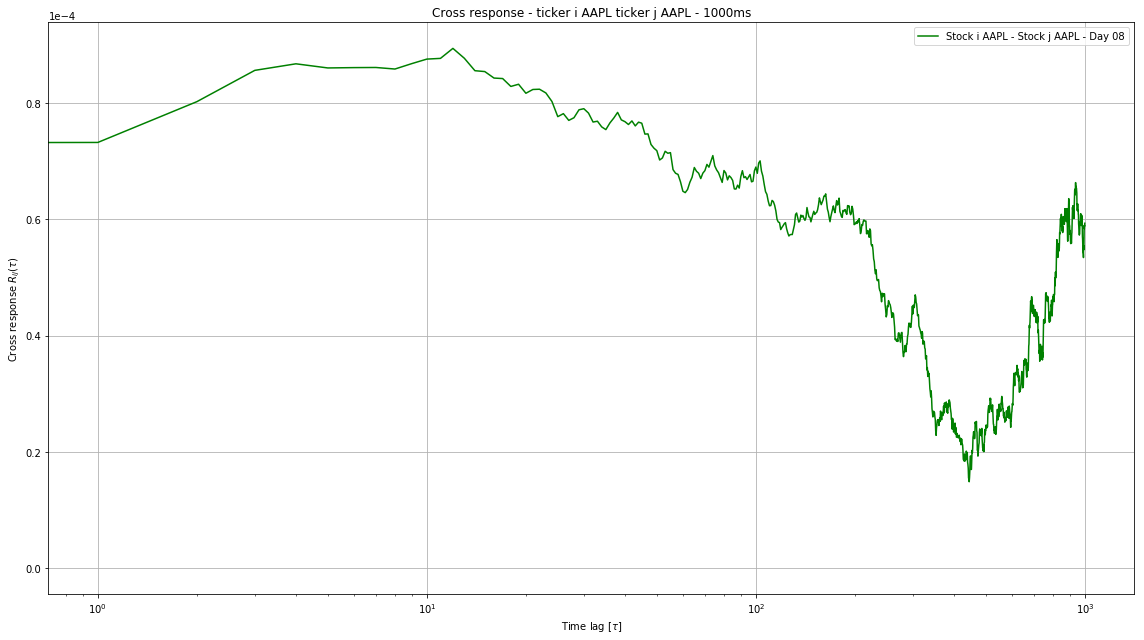

In [29]:
cross_response_tau, trade_sign_j_sec_avg, trade_sign_j_sec_nr, trade_sign_j_sec_sum, time, trade_sign_j = cross_response_data(ticker_i, ticker_j, day, tau_val, t_step)

plt.figure(figsize=(16,9))
plt.semilogx(cross_response_tau, '-g', label='Stock i {} - Stock j {} - Day {}'
                     .format(ticker_i, ticker_j, day))
plt.xlabel(r'Time lag $[\tau]$')
plt.ylabel(r'Cross response $ R_{ij} (\tau) $')
plt.legend(loc='best')
plt.title('Cross response - ticker i {} ticker j {} - {}ms'
          .format(ticker_i, ticker_j, t_step))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()

In [30]:
time_t_step = time[:n*t_step] / 3600 / 1000 # time of the original data
time_reshape = time[:n * t_step: t_step] / 3600 / 1000 + 1/7200
trade_sign_orig = trade_sign_j[:n*t_step]
trade_sum = trade_sign_j_sec_sum[:n]
sec = time[:n*t_step:t_step]/ 3600 / 1000
zero = np.zeros(len(time[:n*t_step:t_step]))

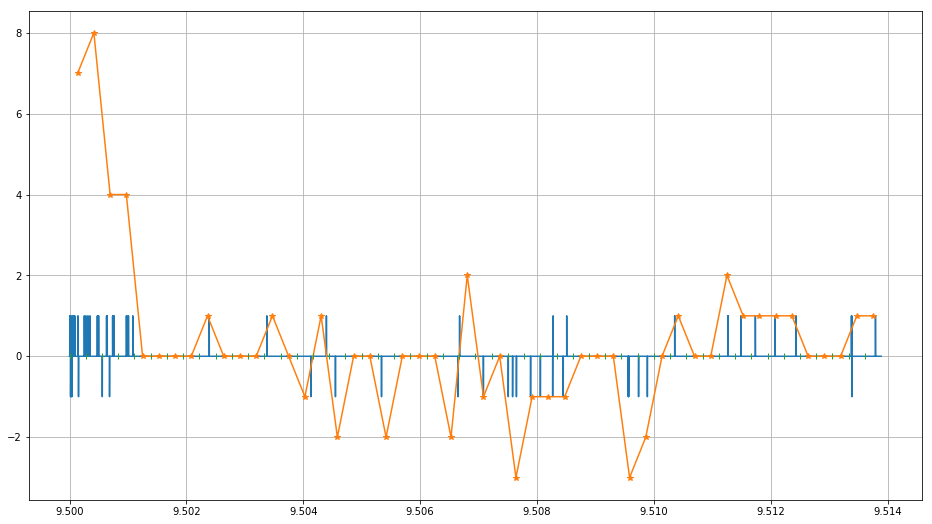

In [31]:
plt.figure(figsize=(16, 9))
plt.plot(time_t_step, trade_sign_orig)
plt.plot(time_reshape, trade_sum, '*-')#, markersize=5)
plt.plot(sec,zero , '|')#, markersize=3)
plt.grid(True)
plt.savefig('../../a.svg', format='svg', dpi=1200)

In [8]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
ticker_j = 'AAPL'
day = '08'
tau_val = 1000
t_step = 100
n = 50

Cross response function data
Processing data for the stock i AAPL and stock j AAPL the day 08 March, 2016
Time step:  100 ms


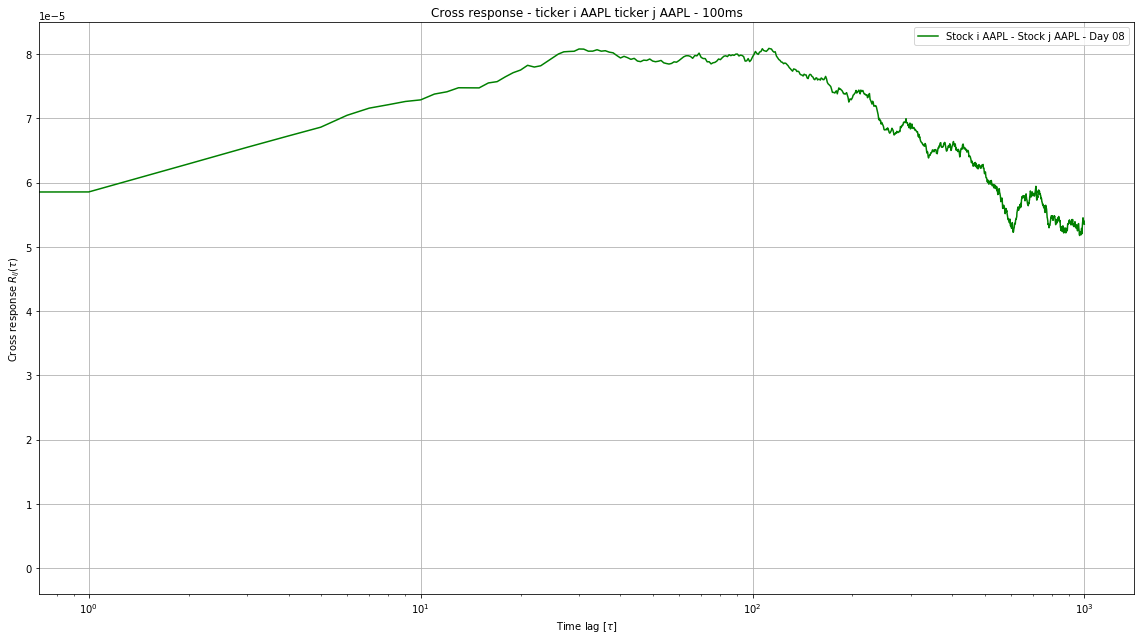

In [9]:
cross_response_tau, trade_sign_j_sec_avg, trade_sign_j_sec_nr, trade_sign_j_sec_sum, time, trade_sign_j = cross_response_data(ticker_i, ticker_j, day, tau_val, t_step)

plt.figure(figsize=(16,9))
plt.semilogx(cross_response_tau, '-g', label='Stock i {} - Stock j {} - Day {}'
                     .format(ticker_i, ticker_j, day))
plt.xlabel(r'Time lag $[\tau]$')
plt.ylabel(r'Cross response $ R_{ij} (\tau) $')
plt.legend(loc='best')
plt.title('Cross response - ticker i {} ticker j {} - {}ms'
          .format(ticker_i, ticker_j, t_step))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()

In [18]:
time_t_step = time[:n*t_step] / 3600 / 10 # time of the original data
time_reshape = time[:n * t_step: t_step] / 3600 / 10 + 0.001
trade_sign_orig = trade_sign_j[:n*t_step]
trade_sum = trade_sign_j_sec_sum[:n]
sec = time[:n*t_step:t_step]/ 3600 / 10
zero = np.zeros(len(time[:n*t_step:t_step]))

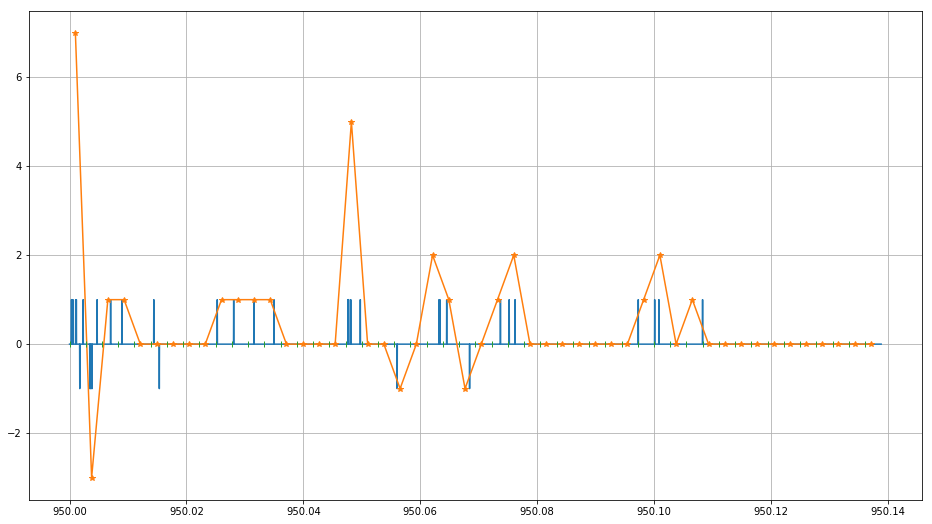

In [19]:
plt.figure(figsize=(16, 9))
plt.plot(time_t_step, trade_sign_orig)
plt.plot(time_reshape, trade_sum, '*-')#, markersize=5)
plt.plot(sec,zero , '|')#, markersize=3)
plt.grid(True)
plt.savefig('../../a.svg', format='svg', dpi=1200)